# Regression

Regression is a statistical concept studying any existing relationships between two or more variables. Machine Learning uses Regression to derive models for the sake of analysis, predictions and classifications of a data in interest.<br>
Usually, in regression problems, there is one dependent variable with at least one or more independent variables. The dependend variable is refered to as **predicted, label, class, or cluster** where the independed varialbe(s) is refered to as **predector(s), regressor(s), or featrue(s)**.

Data is, usually, presented as an nd_array of featrues where each column holds a feature of the data and each row holds one instance from each feature. Classes, or depended vairable, are provided as a vector of values. The feature matrix is commonly known as ** Design Matrix**.<br>
It is important to say that Machine Learning techniques are applied to a sample from the space of the universe of the given data. If the whole universe of the data is available, then one can drow a function of order n-1, where n is the _universe size_, to pass by all the points of the data. Hence, it is not a learning problem rather than a calculus problem, in fact a tedious one!

This notebook tries to give a gentle introduction to the problem of regression in machine learning along with mathematical concepts underlying them. The code for implementing their algorithms is also availbel with a great help of Anaconda2 libraries.

### Building Up an Example

To start discussing linear regression, we should have an existing data to work on. Real dataset is, of course, preferable. There are large data houses where someone can target and play with. choosing a dataset is a critical decision! some of data available on the web might be corrupted, not properly collected, or some features are missin, therefore results are inappropriate or might have a weird sense.<br>
There are plenty of online data resources such as, just to name a few, Kaggle, Wikipedia Google could, Amazon cloud and of course Github.
This blog is useful to look at:
https://www.dataquest.io/blog/free-datasets-for-projects/


Fortunately, scikit learn library provides bunch of datasets ready to do analisys with.<br>
I am going, However, to choose the dataset given in the course assignments for regression problems. That is, kc_house_data.csv. I am going to import it as Panda dataframe so that it is easy to manipulate by scikit and numpy algorithms. Althought there are many other alternatives, working with Pandas data frames seems to be more convenient and the first choice to come in mind. Moreover, some other libraries, i.e. graphlab, requires a licence!

In [1]:
# Load Pandas to read the csv file. You should have that file and the ipython file in the same directory.
import pandas as pd

# This is a pretty function from Ipython library. It can be used print many formats including images as well!!
from IPython.display import display

file_name = 'kc_house_data.csv'
data = pd.read_csv(file_name)

# You can visualize the data by un/commenting the following statement:
#display(data)


### Linear Regression with only one variable

Let us start our discussion of regression algorithms on data having only one independent variable. Suppose that you are given the following data:

In [2]:
simple_model = {'x':[11, 23, 17, 14, 25, 18, 16, 20], 'y':[77, 103, 85, 81, 111, 91, 83, 93]}
simple_model_data_frame = pd.DataFrame(data=simple_model)

#display(df_one_variable_reg)

let us plot this data against the independent variable:

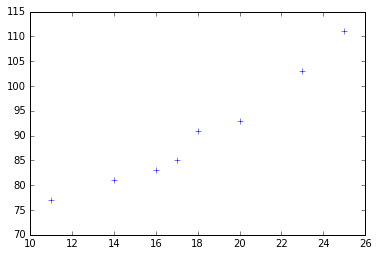

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.ylim(70,115)
plt.plot(simple_model_data_frame['x'], simple_model_data_frame['y'], '+')

for this simple dataset, a linear relationship between $x$ and $y$ is easily observed. _Is there a possibility to drow a line that matches all the $x$ points to their associated $y$ points?_ clearly the answer is _NO_. Data are not distributed uniformly along a straight line.

However, there exists lines such that the difference between the true $y$ and the predictions values $\hat{y}$ are minimal. This differene is refered to as __Residual Sum of error Squares or RSS.__

**How to come up with such line??**

to start deriving the equation, let us say that $\hat{B_0}$ and $\hat{B_1}$ represents the intercept and slope of the true model with minimal _RSS_. then:

The sum of squares of errors between true values and that line is:

$$S = \sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n(y_i - \hat{y}_{i})^2$$
OR
$$S = \sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n(y_i - (B_0 +B_1x_i))^2$$

This function is called the ** error or loss function**
Here, we are squaring the error for two main reasons:
- Some errors might be positives while others might be negatives. If we did not square them, they may cancel out each other by the summation.
- By squaring the error, we can come up with a useful formula to derive the optimal values of slope and intercept. ($x^2$) function has a very nice property such that it has only one minimum , or maximum, point. Thus, it has a derivative of zero somewhere.

By optimizing error's parameters, we can reach to an optimal point for $S$ as follows.

Our main objective is to find a zero RSS or a minimum RSS. Therefore, we can equate RSS to zero and take derivative for both sides. the following equations are obtained.

So, for $B_0$:
$$\frac{\partial S}{\partial B_0} = -2\sum_{i=1}^n(y_i - \hat{B_0} - \hat{B_1}x_i)$$

and for $B_1$:
$$\frac{\partial S}{\partial B_1} = -2\sum_{i=1}^n(y_i - \hat{B_0} - \hat{B_1}x_i)x_i$$

Symplifying these two equations yields:

$$nB_0 + B_1 \sum_{i=1}^nx_i=\sum_{i=1}^n y_i$$

$$B_0\sum_{i=1}^nx_i + B_1 \sum_{i=1}^nx_i^2=\sum_{i=1}^n y_i x_i$$

These are called, _Normal Equatoins_. **Solving these equations for the unkowns:**



for the first equation, multiplying by $\sum_{i=0}^n x_i$

$$nB_0 \sum_{i=0}^n x_i + B_1 (\sum_{i=1}^n x_i)^2= \sum_{i=1}^n y_i \sum_{i=1}^n x_i$$

for the second equation, multiplying by $n$
$$nB_0\sum_{i=1}^n x_i + nB_1 \sum_{i=1}^nx_i^2= n \sum_{i=1}^n y_i x_i$$

subtracting both equations:

$$B_1(n \sum_{i=1}^n x_i^2 - (\sum_{i=0}^n x_i)^2) = n \sum_{i=1}^n y_i x_i - (\sum_{i=1}^n y_i \sum_{i=1}^n x_i)$$ 

Finally, $B_1$ is:

$$B_1 = \frac{n \sum_{i=1}^n y_i x_i - (\sum_{i=1}^n y_i \sum_{i=1}^n x_i)}{n \sum_{i=1}^n x_i^2 - (\sum_{i=0}^n x_i)^2}$$

We can, moreover, do the same to find $B_0$. But we know that $B_0$ is the intercept of the line. Therefore, after finding the slope of the line, we can use it to estimate the optimal intercept from the following equation:

$$B_0 = \bar y - B_1 \bar x$$
where $\bar y$ represents the mean of the output vector, and $\bar x$ represents the mean of the input vector.

We are, in this context, more convertable with $w_0, w_1$ notations to represent the weights of our model i.e. the slope and the intercept of the true model. Thus, we can re-write these equations as follows:

<br>

$$w_1 = \frac{n \sum_{i=1}^n y_i x_i - (\sum_{i=1}^n y_i \sum_{i=1}^n x_i)}{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}$$

<br>

$$w_0 = \bar y - w_1 \bar x$$

<br>

The following code will apply these formulas to come up with a linear model for any given data with one variable, x.

In [4]:
import numpy as np
#Algorithm 1

'''
:param x: The input vector of the dataset.
:param y: The ouput vector of the dataset.
:return: a tuple of (w0,w1) representing the slope and the intercept of the linear model.
'''

def linear_model_generator(x,y):
    #insure that the x and y vectors are numpy arrays:
    x = np.array(x)
    y = np.array(y)
    
    #setting up the equations parameters.
    n = len(x)
    xy_sum = (x*y).sum()
    x_sum = x.sum()
    y_sum = y.sum()
    x2_sum = (x*x).sum()
    x_mean = x.mean()
    y_mean = y.mean()
    
    #calculate slope
    numerator = (n*xy_sum - (y_sum * x_sum))
    denumerator = (n*x2_sum - x_sum**2)
    w1 = numerator/denumerator
    
    #calculate intercept
    w0 = y_mean - w1*x_mean
    
    return (w0,w1)
    

Let us come up with the model parameters, i.e. $w_0$, $w_1$, for our data set. 

In [5]:
model_parameters = linear_model_generator(simple_model['x'],simple_model['y'])
print 'model_parameters are:\nintercept:', model_parameters[0],' and slope:',model_parameters[1]

model_parameters are:
intercept: 54.5  and slope: 2


Let us visualize our model on the dataset:

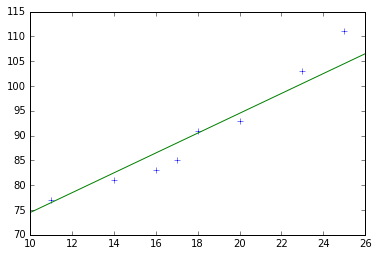

In [6]:
plt.plot(simple_model_data_frame['x'], simple_model_data_frame['y'], '+')

# this code is to get the x axis values.
axes = plt.gca()
x_vals = np.array(axes.get_xlim())

# this code is defining the model parameters
y_vals = model_parameters[0] + model_parameters[1] * x_vals

# this line is printing the line to the screen
plt.plot(x_vals, y_vals, '-')

plt.show()

An important measure to charachterize a model is the **RSS**, the residual sum of error squares. since we have generated an optimal parameters, we are claiming that our linear model has the smallest RSS value among other linear models. The following code will output the RSS value for a given linear model, you can try other lines but RSS is never less than this model.

In [7]:

#Algorithm 2

def calculate_RSS_for_linear_model (intercept, slope, input_data ,real_data_output):
    '''
    :param intercept: The intercept of the line.
    :param y: The slope of the line.
    :return: an RSS value.
    '''
    
    #calculate the model output
    predictions = intercept+slope*input_data
    
    #subtract model output from the true  output to get the erorr
    erorrs = predictions - real_data_output
    
    #square each error in the error vector
    erorrs = erorrs **2
    
    #sum the errors squared vector to get RSS
    RSS = erorrs.sum()
    
    return RSS
    


following are some linear models RSS along side our model.


In [8]:
print 'RSS for the optimal model:',calculate_RSS_for_linear_model(model_parameters[0], model_parameters[1], simple_model_data_frame['x'], simple_model_data_frame['y'])

print 'RSS for other models'

print calculate_RSS_for_linear_model(45, 2, simple_model_data_frame['x'], simple_model_data_frame['y'])

print calculate_RSS_for_linear_model(4.5, 4.5, simple_model_data_frame['x'], simple_model_data_frame['y'])

print calculate_RSS_for_linear_model(45, 45, simple_model_data_frame['x'], simple_model_data_frame['y'])

print calculate_RSS_for_linear_model(2, 1, simple_model_data_frame['x'], simple_model_data_frame['y'])

print calculate_RSS_for_linear_model(52, 1.89, simple_model_data_frame['x'], simple_model_data_frame['y'])


RSS for the optimal model: 78.0
RSS for other models
800
863.0
4943564
40124
255.314


### Non-linear Models with One Independent Variable

As we saw in the previous section, linear models are easy to compute. However, not all data have a linear relationship between its variables! Actually, there is a big set of data having a non-linear relationship. Let us go back with are generated example(`simple_model_data_frame`). Assume that the data provider tackles more tests and compe up with this completion to the original dataset given earlier.

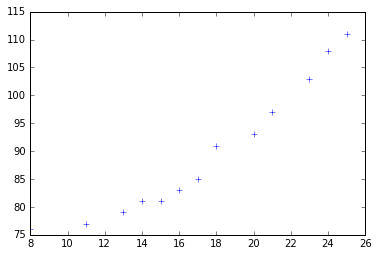

In [9]:
extentions = pd.DataFrame({'x':[15, 8, 21, 24, 13], 'y': [81, 76, 97, 108, 79]})

extended_simple_model_data_frame = simple_model_data_frame.append(extentions, True)

plt.plot(extended_simple_model_data_frame['x'], extended_simple_model_data_frame['y'], '+')

By ploting the data againist the non-dependent variable, we can convince ourself that a kind of parabolic relationship exists. **How can we derive an optimal model for such relationships??**

A good answer for this question is to optimize our loss, RSS, function we derive it in the previous part. By optimizing the loss function ,we will come up with the best model parameters. However, there are few notes to say:
- Any quadratic function $ax^2 + bx + c$ has three parameters, a,b and c. In our case, we are following the convensions of calling them $w_0$, $w_1$, and $w_2$. It is easily visualized as a vector of W's. let us call it ** The Weight vector**.
- Optimizing the previous loss, RSS, function requires matrix manipulation and derivation, which might be a new concept but not hard to understand.
- It is important to notice that when calculating the predictions of the model, the transposed weights vector is multiplied by the $x_i$ sample. where $x_i$ is the row $i$ from the design matrix (i.e. the features matrix). consequently, the weights vector must have a length equal to the number of features + 1 "for the intercept". Recall that matrix transpose $A^T$ is the same matrix $A$ values, but columns become rows and vice versa.
- It is also imporatant to notice that the term of the loss function $(y_i - \hat{y}_{i})^2$ is a scalar. Although it contains matrecies.

We are transpoing the weights vector to do inner product. **Inner product will output only one value while outer product** " multipling the weights vector by the feature matrxi without transposing"** will produce a vector not a single value.**

Recall that matrix transpose operation is no thing but converting columns to rows and rows to columns.

Recalling back, the loss function is :

$$S = \sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n(y_i - \hat{y}_{i})^2$$
OR
$$S = \sum_{i=1}^n \epsilon^2 = (Y - (W^TX))^2$$

where $W$ is the weights vector, $x_i$ is the design matrix and $y_i$ is the true output vector.

since the term $( - (W^TX))^2$ is scalar, and the scalar and its transpose are equal, The loss function can be re-written as:

$$S = \sum_{i=1}^n \epsilon^2 = (Y- (W^TX))^T(Y - (W^TX))$$

Optimizing this loss function to get an optimal value for RSS:

$$S = (Y - (W^TX))^T(Y - (W^TX))$$
- distribute the Transpose operation over the terms:


$$S = (Y^T - (W^TX)^T)(Y - (W^TX))$$
- distribute the Transpose again in the inner term:


$$S = (Y^T - (X^TW))(Y - (W^TX))$$
- multiply both terms:


$$S = (Y^TY - Y^T(W^TX))-(X^TWY - X^TW(W^TX))$$
- re-write the equation:


$$S = (Y^TY - Y^TW^TX)-(X^TWY - X^TW^TWX)$$


- since $Y^TW^TX = X^TWY$, " they are two vectors multiplied by thier transpose interchangeably", we can furhter simplify
and write the previous equation as:


$$S = (Y^TY - 2X^TWY + X^TW^TWX)$$


Recall that $x^TW^TWx$ is a matrix written in the quadratic form. It has the same derivative as $x^2$ where $x$ is the unkwown $w$.




**Now**, this equation can be derived to find the best values for $W$ as follows:


$$\frac{\partial S}{\partial W}= (0 - 2X^TY + 2X^TXW)$$

Equate this result with ZERO to find the optimal point:

$$\frac{\partial S}{\partial W}= (-X^TY + X^TXW) = 0$$

$$(X^TXW) = X^TY$$


** Therefore, Otpimal values for the weights vector are:**

$$W = (X^TX)^{-1}X^TY$$

Let us write this result in a python code and test it on our data to see the results:

In [102]:
#Algorithm 3

def second_order_model_generator (x ,y):
    '''
    :param x: The design matrix.
    :param y: output vector.
    :return: a second order model parameters, w0, w1 and w2.
    '''
    #insure that the x and y vectors are numpy arrays:
    x = np.array(x)
    y = np.array(y)
    
    #calculate xt
    xt = np.transpose(x);
    
    #calculate xtx
    
    xtx = np.matmul(xt, x)
    
    #invert xtx
    #first convert xtx matrix to intergers.
    xtx = xtx.astype(np.int)
    #then, do the inversion operation.
    xtx_inv = np.invert(xtx)
    
    #find out W
    w = np.matmul(np.matmul(xtx_inv,xt), y)
    
    return w

Let us now apply this function on our data. However, before using the algorihtm, we should be aware that our orignal data contains only a single vector of x and the model we want to come up with is a quadratic mode, therefore, we need to introduce two other vectors to the input vector ,x, and create an input matrix call it input_matrix. This second vector is initialized to to be x^2 "squaring the origianl vector" and the first one is initialized to be zeros.

In [103]:
n = len(extended_simple_model_data_frame['x'])
input_matrix = np.matrix([np.ones(n), extended_simple_model_data_frame['x'], extended_simple_model_data_frame['x']**2])
input_matrix = input_matrix.transpose()

print input_matrix


second_order_model_parameters = second_order_model_generator(input_matrix,extended_simple_model_data_frame['y'])
print 'model_parameters are:', second_order_model_parameters

[[   1.   11.  121.]
 [   1.   23.  529.]
 [   1.   17.  289.]
 [   1.   14.  196.]
 [   1.   25.  625.]
 [   1.   18.  324.]
 [   1.   16.  256.]
 [   1.   20.  400.]
 [   1.   15.  225.]
 [   1.    8.   64.]
 [   1.   21.  441.]
 [   1.   24.  576.]
 [   1.   13.  169.]]
model_parameters are: [ -1.70368509e+09  -3.38891771e+10  -7.05795370e+11]


In [87]:
def predict_output(x, w):
    #insure that the x and y vectors are numpy arrays:
    x = np.array(x)
    w = np.array(w)
    
    #Transpose w
    wt = w.transpose()
    
    predictions = x.dot(wt)
    
#     predictions = []
#     #predict output by doing dot product
#     for i in x:
#         predictions.append(wt.dot(i))
    
    return predictions
    

[ -8.57757244e+13  -3.74146905e+14  -2.04552682e+14  -1.38812045e+14
  -4.41971039e+14  -2.29289409e+14  -1.81227545e+14  -2.82997635e+14
  -1.59314000e+14  -4.54437208e+13  -3.11969134e+14  -4.07353177e+14
  -1.19721680e+14]


ValueError: x and y must have same first dimension

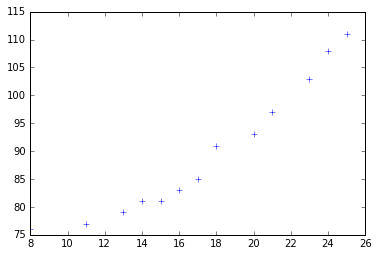

In [88]:


plt.plot(extended_simple_model_data_frame['x'], extended_simple_model_data_frame['y'], '+')

# this code is to get the x axis values.
axes = plt.gca()
x_vals = np.array(axes.get_xlim())

# this code is defining the model parameters
y_vals = predict_output(input_matrix, second_order_model_parameters)

print y_vals
# this line is printing the line to the screen
plt.plot(x_vals, y_vals, '-')

plt.show()
